Anillo 2D

In [ ]:
# Anillo con Corriente en 2D

import numpy as np
import matplotlib.pyplot as plt

#  Constantes
A = 1.0  
R = 1.0  # Radio del anillo con corriente

# Meshgrid de los puntos
x, y = np.meshgrid(np.linspace(-3, 3, 400), np.linspace(-3, 3, 400))

# Conversión a polares
r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

# Definimos los componentes del campo magnético dentro del anillo
B_r_in = A * np.cos(theta)
B_theta_in = -A * np.sin(theta)
B_x_in = B_r_in * np.cos(theta) - B_theta_in * np.sin(theta)
B_y_in = B_r_in * np.sin(theta) + B_theta_in * np.cos(theta)

#Definimos los componentes del campo magnético fuera del anillo
B_r_out = -(2 * A * R**3 / r**3) * np.cos(theta)
B_theta_out = -(A * R**3 / r**3) * np.sin(theta)
B_x_out = B_r_out * np.cos(theta) - B_theta_out * np.sin(theta)
B_y_out = B_r_out * np.sin(theta) + B_theta_out * np.cos(theta)

# Mask de las regiones
B_x = np.where(r < R, B_x_in, B_x_out)
B_y = np.where(r < R, B_y_in, B_y_out)

# Graficamos las líneas de campo magnético
fig, ax = plt.subplots(figsize=(8, 8))
ax.streamplot(x, y, B_x, B_y, color='blue', linewidth=1, density=1, arrowstyle='->')

# Agregamos el anillo de corriente
circle = plt.Circle((0, 0), R, color='red', fill=False)
ax.add_artist(circle)

# Detalles de la gráfica
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Mostramos
plt.show()


Anillo 3D

In [1]:
# Anillo con Corriente en 3D
# Solo líneas de campo

import numpy as np
from mayavi import mlab

# Campo magnético dentro del anillo de corriente
def B_inside_loop(r, A):
    x, y, z = r[:, 0], r[:, 1], r[:, 2]
    theta = np.arctan2(y, x)
    
    Bx = A * np.cos(theta)
    By = -A * np.sin(theta)
    Bz = np.zeros_like(z)
    
    B = np.stack((Bx, By, Bz), axis=-1)
    return B

# Campo magnético afuera del anillo de corriente
def B_outside_loop(r, A, R):
    x, y, z = r[:, 0], r[:, 1], r[:, 2]
    r_mag = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(y, x)
    
    Br = -2 * A * R**3 * np.cos(theta) / r_mag**3
    Btheta = -A * R**3 * np.sin(theta) / r_mag**3
    
    Bx = Br
    By = Btheta
    Bz = np.zeros_like(z)
    
    B = np.stack((Bx, By, Bz), axis=-1)
    return B

# Constantes
R = 0.1  # Radio del anillo
A = 1.0  

# Definimos el grid de puntos
X, Y, Z = np.mgrid[-0.2:0.2:11j, -0.2:0.2:11j, -0.2:0.2:11j]

r = np.c_[np.ravel(X), np.ravel(Y), np.ravel(Z)]

# Incializamos el array para el campo magnético
B = np.zeros_like(r)

# Calculamos el campo magnético
inside_mask = np.sqrt(np.sum(r[:, :2]**2, axis=1)) <= R
outside_mask = ~inside_mask

B[inside_mask] = B_inside_loop(r[inside_mask], A)
B[outside_mask] = B_outside_loop(r[outside_mask], A, R)

# Visualización
Bx, By, Bz = B[:, 0].reshape(X.shape), B[:, 1].reshape(Y.shape), B[:, 2].reshape(Z.shape)

mlab.figure(size=(800, 800), bgcolor=(1, 1, 1))
mlab.quiver3d(X, Y, Z, Bx, By, Bz, scale_factor=0.1, line_width=2, color=(0, 0, 1))
mlab.title('Campo Magnético de Anillo con Corriente', size=0.5)

mlab.show()


: 

In [ ]:
# Anillo con Corriente en 3D
# Líneas y anillo

import numpy as np
from mayavi import mlab

# Vectores normales
def base_vectors(n):
    n = n / np.linalg.norm(n)
    if abs(n[0]) == 1:
        l = np.array([n[2], 0, -n[0]])
    else:
        l = np.array([0, n[2], -n[1]])
    l = l / np.linalg.norm(l)
    m = np.cross(n, l)
    return n, l, m

# Campo magnético dentro del anillo de corriente
def B_inside_loop(r, R, A, current_direction):
    x, y, z = r[:, 0], r[:, 1], r[:, 2]
    r_mag = np.sqrt(x**2 + y**2 + z**2)
    
    Bx = np.zeros_like(x)
    By = np.zeros_like(y)
    Bz = np.zeros_like(z)

    if current_direction == "z":
        By = A * R**2 / (2 * (R**2 + z**2)**(3/2)) * x
        Bx = -A * R**2 / (2 * (R**2 + z**2)**(3/2)) * y
    elif current_direction == "x":
        Bz = A * R**2 / (2 * (R**2 + y**2)**(3/2)) * x
        By = -A * R**2 / (2 * (R**2 + y**2)**(3/2)) * z
    elif current_direction == "y":
        Bx = A * R**2 / (2 * (R**2 + z**2)**(3/2)) * y
        Bz = -A * R**2 / (2 * (R**2 + z**2)**(3/2)) * x

    B = np.stack((Bx, By, Bz), axis=-1)
    return B

# Campo magnético afuera del anillo de corriente
def B_outside_loop(r, R, A):
    x, y, z = r[:, 0], r[:, 1], r[:, 2]
    r_mag = np.sqrt(x**2 + y**2 + z**2)
    
    Br = -2 * A * R**3 * x / r_mag**3
    Btheta = -A * R**3 * y / r_mag**3
    
    Bx = Br
    By = Btheta
    Bz = np.zeros_like(z)
    
    B = np.stack((Bx, By, Bz), axis=-1)
    return B

# Constantes
R = 0.1  # Radio del anillo
A = 1.0 
current_direction = "z"  # Dirección del anillo de corriente ("x", "y", or "z")

# Definimos el grid de puntos
X, Y, Z = np.mgrid[-0.2:0.2:21j, -0.2:0.2:21j, -0.2:0.2:21j]

r = np.c_[np.ravel(X), np.ravel(Y), np.ravel(Z)]

# Incializamos el array para el campo magnético
B = np.zeros_like(r)

# Calculamos el campo magnético
inside_mask = np.sqrt(np.sum(r[:, :2]**2, axis=1)) <= R
outside_mask = ~inside_mask

B[inside_mask] = B_inside_loop(r[inside_mask], R, A, current_direction)
B[outside_mask] = B_outside_loop(r[outside_mask], R, A)

# Visualización
Bx, By, Bz = B[:, 0].reshape(X.shape), B[:, 1].reshape(Y.shape), B[:, 2].reshape(Z.shape)
B_norm = np.sqrt(Bx**2 + By**2 + Bz**2)

mlab.figure(size=(800, 800), bgcolor=(1, 1, 1))
mlab.quiver3d(X, Y, Z, Bx, By, Bz, scale_factor=0.1, line_width=2, color=(0, 0, 1))
mlab.contour3d(X, Y, Z, B_norm, contours=10, transparent=True, opacity=0.5)
mlab.title('Campo Magnético de Anillo con Corriente', size=0.5)

mlab.show()


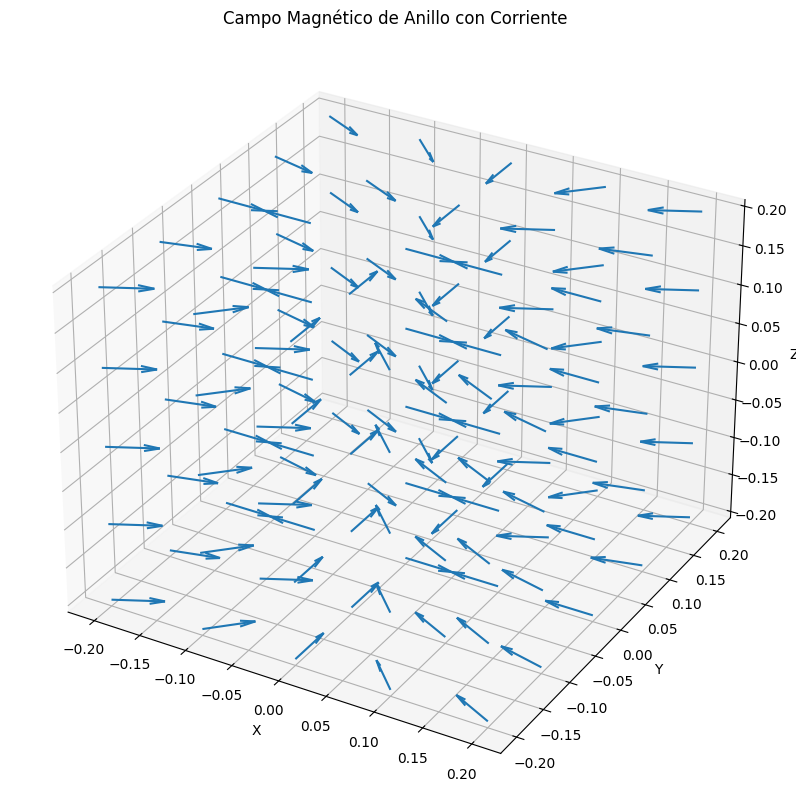

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Magnetic field inside the current loop
def B_inside_loop(r, A):
    x, y, z = r[:, 0], r[:, 1], r[:, 2]
    theta = np.arctan2(y, x)
    
    Bx = A * np.cos(theta)
    By = -A * np.sin(theta)
    Bz = np.zeros_like(z)
    
    B = np.stack((Bx, By, Bz), axis=-1)
    return B

# Magnetic field outside the current loop
def B_outside_loop(r, A, R):
    x, y, z = r[:, 0], r[:, 1], r[:, 2]
    r_mag = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(y, x)
    
    Br = -2 * A * R**3 * np.cos(theta) / r_mag**3
    Btheta = -A * R**3 * np.sin(theta) / r_mag**3
    
    Bx = Br
    By = Btheta
    Bz = np.zeros_like(z)
    
    B = np.stack((Bx, By, Bz), axis=-1)
    return B

# Constants
R = 0.1  # Radius of the loop
A = 1.0  

# Define the grid of points
X, Y, Z = np.mgrid[-0.2:0.2:5j, -0.2:0.2:5j, -0.2:0.2:5j]  # Reduced grid size for testing

r = np.c_[np.ravel(X), np.ravel(Y), np.ravel(Z)]

# Initialize the array for the magnetic field
B = np.zeros_like(r)

# Calculate the magnetic field
inside_mask = np.sqrt(np.sum(r[:, :2]**2, axis=1)) <= R
outside_mask = ~inside_mask

B[inside_mask] = B_inside_loop(r[inside_mask], A)
B[outside_mask] = B_outside_loop(r[outside_mask], A, R)

# Visualization
Bx, By, Bz = B[:, 0].reshape(X.shape), B[:, 1].reshape(Y.shape), B[:, 2].reshape(Z.shape)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the magnetic field vectors
ax.quiver(X, Y, Z, Bx, By, Bz, length=0.05, normalize=True)

ax.set_title('Campo Magnético de Anillo con Corriente')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
